In [38]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
import datetime as datetime
import mplfinance as mpf

In [12]:
# We want to examine market liquidity in CeFi markets: plot a density plot of prices vs ask volume 

In [65]:
# Candlestick spread chart
# Data: Open, high, low, close, volume in given pool
# Uniswap v3 Query
uniswap_api_key = "2b45e1f034a61c2f41bf4bcd6731335a"
subgraph_id = "5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"
url = f"https://gateway.thegraph.com/api/{uniswap_api_key}/subgraphs/id/{subgraph_id}"

pool_address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"  # CHANGE THIS, MAKE SURE TOKEN1 IS USDC
# Dataframe construction
uniswap_candlestick = pd.DataFrame(columns=['Date', 'Open', 'Close', 'High', 'Low', 'TVL Available (USD)', 'Volume', 'Liquidity'])

# Make queries across date range:
starting_date = "2022-01-01" # CHANGE THIS (YYYY-MM-DD)
ending_date = "2022-03-01" # CHANGE THIS (YYYY-MM-DD)
index = 0

for date in pd.date_range(starting_date, ending_date):
    # Get our desired date
    date_str = date_str = date.strftime("%Y-%m-%d")
    # Convert date to midnight UTC UNIX timestamp
    ts = int(datetime.datetime.fromisoformat(date_str).replace(tzinfo=datetime.timezone.utc).timestamp()) 
    
    # Data queried (all prices of token0 in terms of token1. Make sure you query the right pool so prices are in USDC, token1 = USDC)
    # Opening (first recorded) price, closing (last recorded) price, high price, low price, tvl in pool (in USD), total volume
    # traded in swaps on that day
    query = f"""
    {{
      poolDayDatas(
        first: 1
        where: {{
          pool: "{pool_address.lower()}",
          date: {ts}
        }}
      ) {{
        open
        high
        low
        close
        volumeUSD
        tvlUSD
        liquidity
      }}
    }}
    """

    response = requests.post(url, json={"query": query}).json()
    response = response['data']['poolDayDatas'][0]

    # Dataframe Construction (Continued)
    uniswap_candlestick.loc[len(uniswap_candlestick)] = [date_str, response['open'], response['close'],
                                                         response['high'], response['low'], response['tvlUSD'], response['volumeUSD'],
                                                         response['liquidity']]
    # Uncomment this if exceeding rate limit
    # time.sleep(1) 
uniswap_candlestick["Date"] = pd.to_datetime(uniswap_candlestick["Date"])
uniswap_candlestick = uniswap_candlestick.set_index("Date")
uniswap_candlestick.head(20)

,Open,Close,High,Low,TVL Available (USD),Volume,Liquidity
Date,,,,,,,
2022-01-01,3684.759996058331661372731636420771,3684.759996058331661372731636420771,3765.698910000011444951178987586874,3684.759996058331661372731636420771,405533873.7000463554529854315889319,45705802.26196465219245091541718463,9716610433472976863
2022-01-02,3765.453233382686764581277103945926,3765.453233382686764581277103945926,3835.272652579698984663962703350452,3711.836281130731287326663333158734,420029158.22274437426296766709599,33421708.69330421378231276352291548,21587959940677047495
2022-01-03,3825.895239649412638083212199061639,3825.895239649412638083212199061639,3836.899601032140528774804037131818,3693.294795052506890486643411081227,416468539.2160538439997117324235078,43354339.58898846104669879584647713,10962490021519573899
2022-01-04,3764.693956650248598176141051069728,3764.693956650248598176141051069728,3881.010807967786937990248489807304,3716.471790499331304643448530396778,422809844.3563740492358574083168083,57048224.83541066993345390029804928,11459118643421572224
2022-01-05,3784.417207121366955293491531479587,3784.417207121366955293491531479587,3834.074657133281686121440331911763,3386.371360398259136668732464611252,400414689.8722659019179889065356089,185188580.3788488939750865944322484,13307185591267925723
2022-01-06,3538.550854130801377800203155678729,3538.550854130801377800203155678729,3539.242758941261052563734825595698,3260.690407336813752465958755058634,374335545.7412023416461209104570111,205440131.2492646799952625584416338,8808102743583855577
2022-01-07,3408.372641401596048207468763467188,3408.372641401596048207468763467188,3408.372641401596048207468763467188,3085.614039046986216466706624052832,332370485.0820013855584528690113168,229187844.5562554102460013052958166,7942361067364313342
2022-01-08,3190.141517637145317048162340363639,3190.141517637145317048162340363639,3236.095202149258944934151569475731,2988.774520653323162168661294324466,326310543.1112562788128928574569548,91412986.69136250292533140502156357,8061007200633085634
2022-01-09,3091.082958720736278474909827893216,3091.082958720736278474909827893216,3200.520808231322045074717068185431,3071.843241313840366146639771446187,330725105.4960739564288445955463514,34607595.3332535408344346445139219,8302767027996423678


In [66]:
# Cleanup
uniswap_candlestick = uniswap_candlestick.astype(float)
print(uniswap_candlestick.columns)
print(uniswap_candlestick['Open'].dtype)

Index(['Open', 'Close', 'High', 'Low', 'TVL Available (USD)', 'Volume',
       'Liquidity'],
      dtype='object')
float64


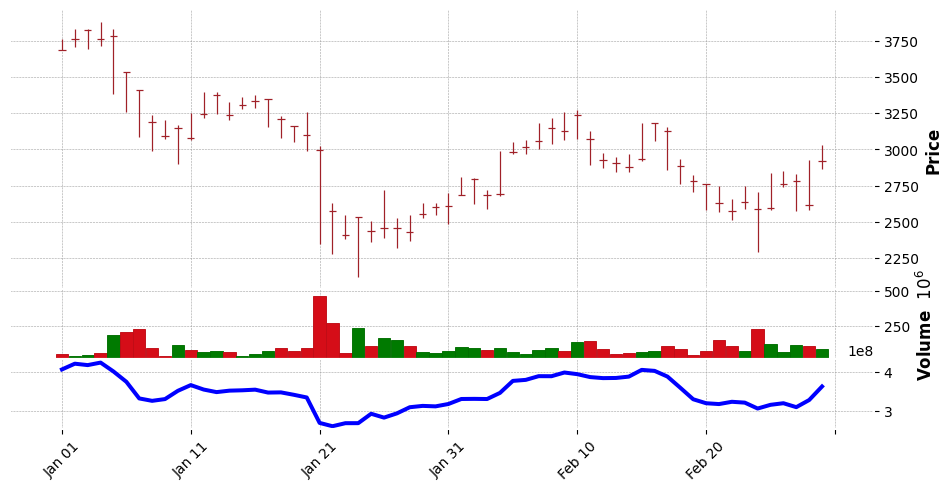

In [89]:
# Create Candlestick Plot
# Install dependency in terminal: pip install mplfinance (in the directory that you are running this notebook in)
s = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    rc={
        'axes.labelsize': 2,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7
    }
)

mpf.plot(
    uniswap_candlestick,
    type='candle',
    style='charles',
    figsize=(12, 6),
    volume=True,
    addplot=[
        mpf.make_addplot(uniswap_candlestick["TVL Available (USD)"], panel=2, color='blue')
        ],
    panel_ratios=(4, 1)
)